# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

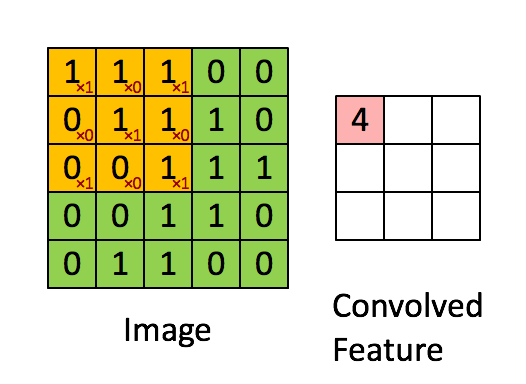

In [309]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [310]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

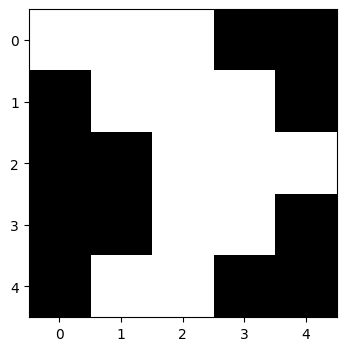

In [311]:
# Visualizing the input.
plt.imshow(I)

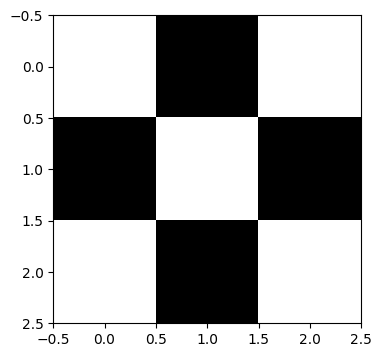

In [312]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [313]:
import numpy as np

def convolution(img, filter):
    """
    Function performs convolution operations.
    Arguments:
    Inputs Arguments:
    img(nd array): numpy array of an input image.
    filter(nd array): numpy array of an input filter.
    Output Arguments:
    Filter_Map of Dimensions specified by eq(2).
    """
    input_dimension = img.shape[0]
    filter_dimension = filter.shape[0]
    output_dimension = input_dimension - filter_dimension + 1

    filter_map = np.zeros(shape=(output_dimension, output_dimension))

    for i in range(output_dimension):
        for j in range(output_dimension):
            # Extract the region of interest (ROI) from the input image
            roi = img[i:i + filter_dimension, j:j + filter_dimension]

            # Element-wise multiplication and sum of the ROI and filter
            filter_map[i, j] = np.sum(roi * filter)

    return filter_map


In [314]:
img = convolution(I, K)

In [315]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


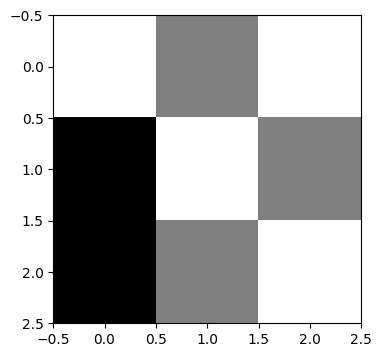

In [316]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [317]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [318]:
data_dir = "/content/drive/MyDrive/AI-Level-6/Week-6/Datasets-20230502T023337Z-001/Datasets/FruitinAmazon/train"

In [342]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [320]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [321]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,  # Set shuffle to True for the train dataset
)


Found 90 files belonging to 6 classes.


In [322]:
import tensorflow as tf


val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',  # Automatically infer labels from subdirectories
    label_mode='categorical',  # Use 'categorical' for one-hot encoded labels or 'binary' for binary labels
    image_size=(180, 180),  # Specify the target image size for resizing
    batch_size=32,  # Batch size for validation
    shuffle=True,  # Shuffle the dataset for validation
    seed=123,  # Random seed for shuffling the dataset
    validation_split=0.2,  # Fraction of data to use for validation
    subset='validation'  # Use 'validation' to create the validation dataset
)


Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [323]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


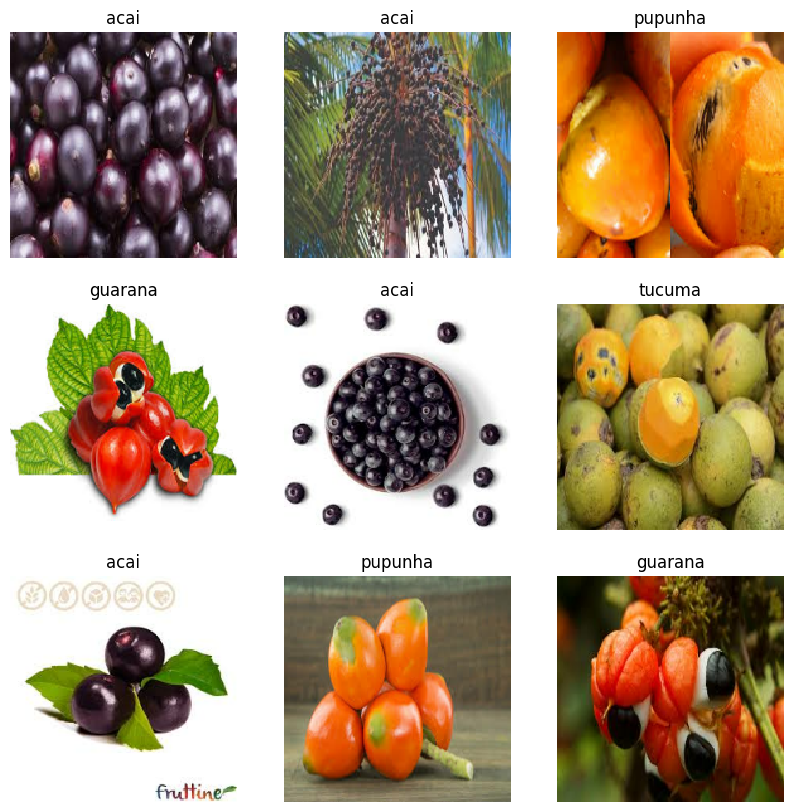

In [324]:
import matplotlib.pyplot as plt

# Define class_names list with the names of your classes

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])  # Convert one-hot encoded label to class name
        plt.axis("off")
plt.show()

In [325]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32, 6)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [326]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with set of hyperparameters defined above.
    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.
    Output Args:
    model-> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Block of Convolution and Pooling Operations
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected classifier
        layers.Flatten(),
        layers.Dense(180, activation='relu'),
        layers.Dense(num_classes, activation='softmax')  # Using softmax for multi-class classification
    ])
    return model

# Example usage:
image_height = 180
image_width = 180
nchannels = 3  # Assuming RGB images
num_classes = 6  # actual number of classes in our dataset

# Create the model
model = generate_model(image_height, image_width, nchannels, num_classes)

# Print a summary of the model architecture
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_19 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_38 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 129600)          

img_height = 180
img_width = 180

In [327]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

In [328]:
model.summary()


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_20 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 45, 45, 64)       0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 129600)          

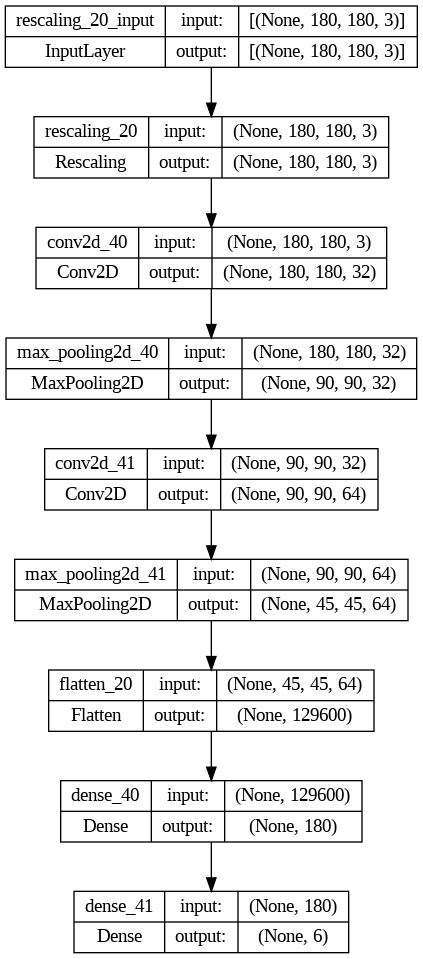

In [329]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [330]:
model.compile(
    optimizer='adam',  # more optimizer (e.g., 'sgd', 'rmsprop', etc.)
    loss='categorical_crossentropy',  #  loss function
    metrics=['accuracy']  # more metrics (e.g., ['accuracy', 'precision', 'recall'])
)


### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [331]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 14.7422 - accuracy: 0.1111 - val_loss: 7.3617 - val_accuracy: 0.0556
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 5.0880 - accuracy: 0.2556 - val_loss: 2.6116 - val_accuracy: 0.3889
Epoch 3/10
3/3 [==============================] - 10s 3s/step - loss: 2.1494 - accuracy: 0.3889 - val_loss: 1.6242 - val_accuracy: 0.3333
Epoch 4/10
3/3 [==============================] - 9s 3s/step - loss: 1.5680 - accuracy: 0.3778 - val_loss: 1.4448 - val_accuracy: 0.3333
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 1.3176 - accuracy: 0.5222 - val_loss: 1.1800 - val_accuracy: 0.6111
Epoch 6/10
3/3 [==============================] - 7s 2s/step - loss: 1.0485 - accuracy: 0.7000 - val_loss: 1.0241 - val_accuracy: 0.7778
Epoch 7/10
3/3 [==============================] - 9s 3s/step - loss: 0.7240 - accuracy: 0.8556 - val_loss: 0.5754 - val_accuracy: 0.9444
Epoch 8/10
3/3 [=======================

## Observe the Model Performance.


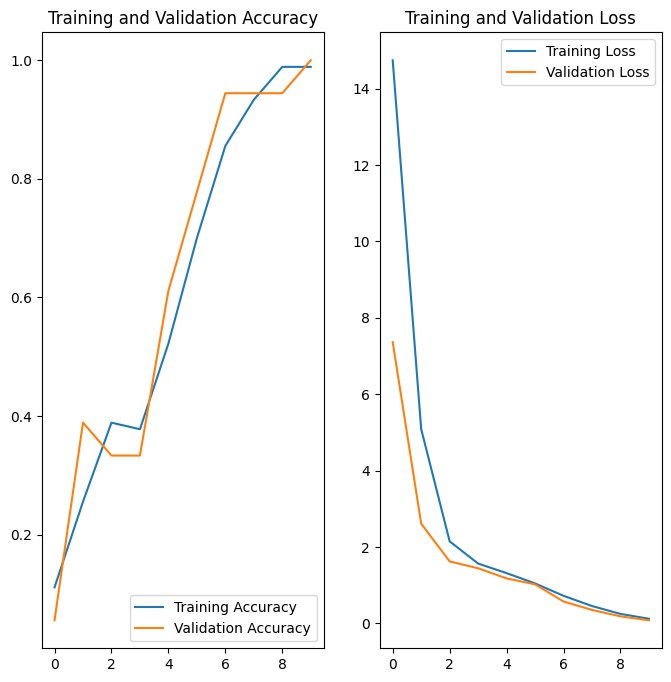

In [332]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# training and validation accuracy from train dataset
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#side plot for training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [333]:
# Save the trained model
model.save('/content/drive/MyDrive/AI-Level-6/Week-6/Datasets-20230502T023337Z-001/Datasets/FruitinAmazon/train_model')

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [334]:
#path tp test data set
data_test = "/content/drive/MyDrive/AI-Level-6/Week-6/Datasets-20230502T023337Z-001/Datasets/FruitinAmazon/test"

## Exercise:

To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework; one such framework is "tf.keras.utils.image_dataset_from_directory("parameter")
Implement above framework and explain the parameters you have used in the comment.

In [335]:
import tensorflow as tf

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_test,
    labels='inferred',
    label_mode='categorical',
    image_size=(180, 180),
    batch_size=32,
    shuffle=False,
)


Found 30 files belonging to 6 classes.


In [336]:
import tensorflow as tf

val_test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_test,
    labels='inferred',  # Automatically infer labels from subdirectories
    label_mode='categorical',  # Use 'categorical' for one-hot encoded labels or 'binary' for binary labels
    image_size=(180, 180),  # Specify the target image size for resizing
    batch_size=32,  # Batch size for validation
    shuffle=False,  # Shuffle the dataset for validation
    seed=123,  # Random seed for shuffling the dataset
    validation_split=0.2,  # Fraction of data to use for validation
    subset='validation'  # Use 'validation' to create the validation dataset
)


Found 30 files belonging to 6 classes.
Using 6 files for validation.


In [337]:
# Printing out number of Classes
class_names = test_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


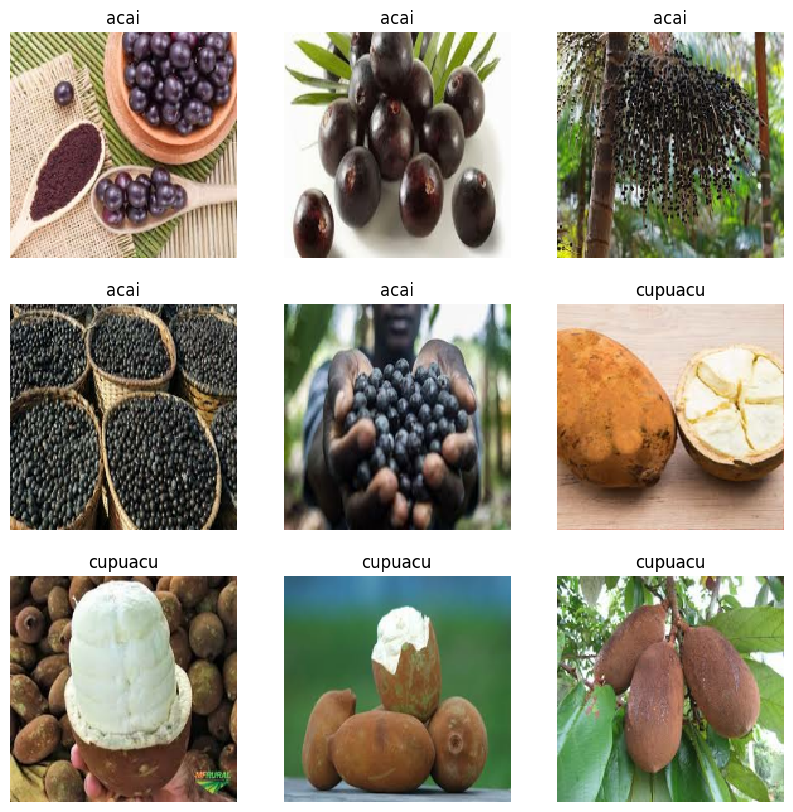

In [338]:
import matplotlib.pyplot as plt

# Define class_names list with the names of your classes
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i])])  # Convert one-hot encoded label to class name
        plt.axis("off")
plt.show()

## Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [339]:
epochs=10
history = model.fit(
  test_ds,
  validation_data=val_test_ds,
  epochs=epochs
)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7178 - accuracy: 0.7333 - val_loss: 0.7599 - val_accuracy: 0.8333
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6423 - accuracy: 0.8333 - val_loss: 0.3317 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.3396 - accuracy: 0.9667 - val_loss: 0.3693 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 4s 4s/step - loss: 0.2221 - accuracy: 1.0000 - val_loss: 0.2285 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.1281 - accuracy: 1.0000 - val_loss: 0.1404 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.0721 - accuracy: 1.0000 - val_loss: 0.0841 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.0401 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=========================

## Observe the Model Performance.

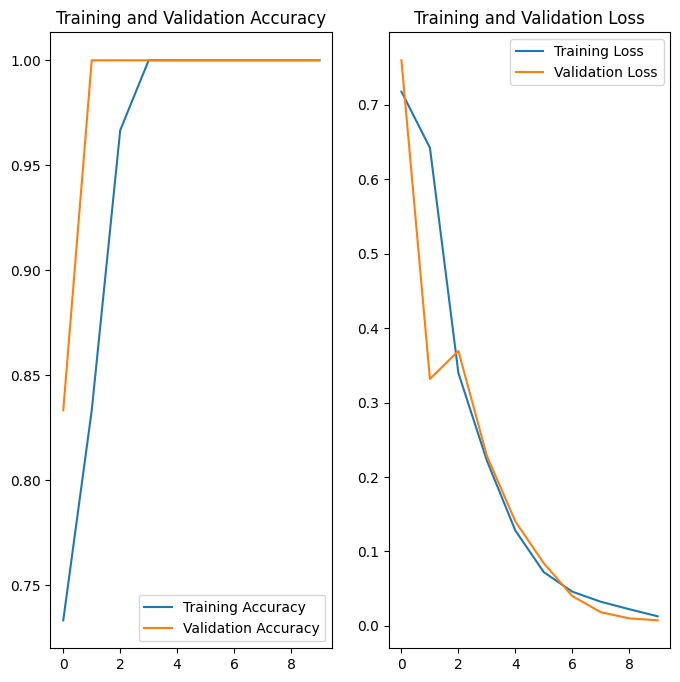

In [340]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
# plot the training and validation of test data set
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# training and validation loss plot on side
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Based on last week built a function which predicts input examples, and also plot the result.


Found 90 files belonging to 6 classes.
1/1 [==============================] - 0s 493ms/step


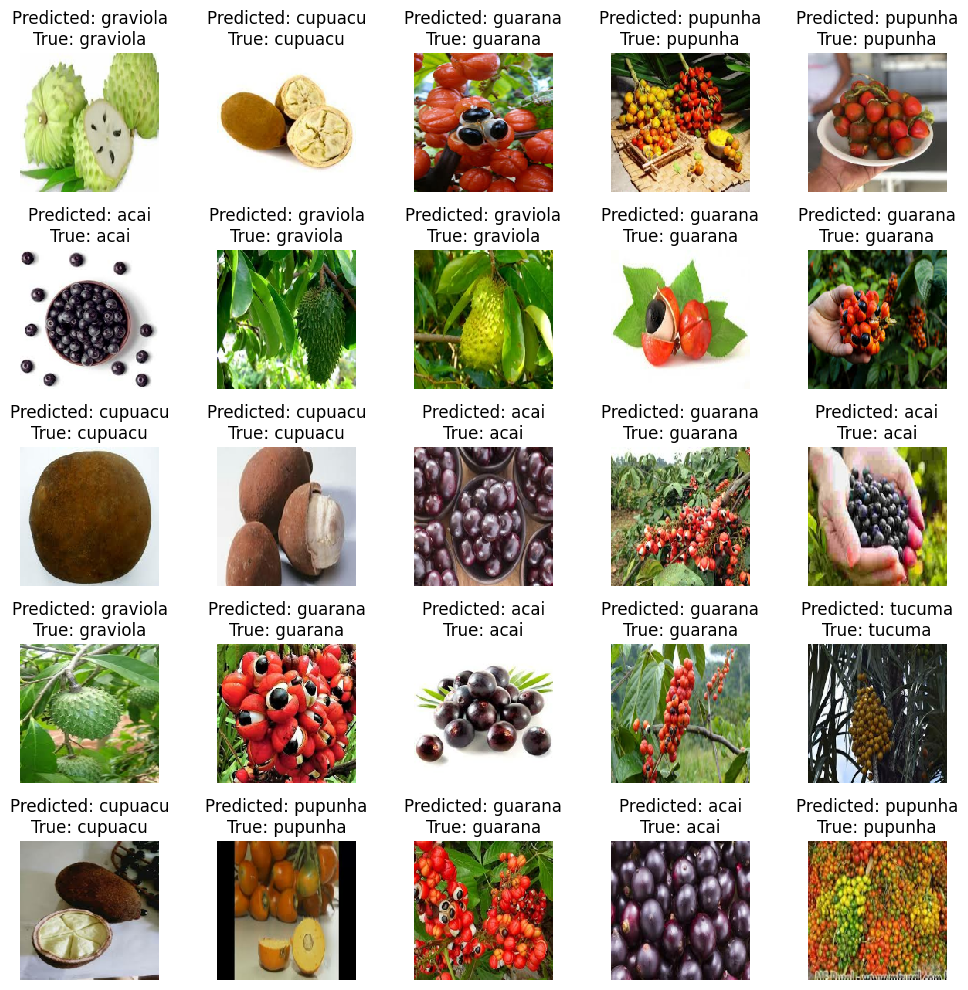

In [341]:

def predict_and_plot(model, dataset, class_names):
    # Iterate over the dataset and make predictions
    predictions = []
    true_labels = []
    images = []
    for batch_images, batch_labels in dataset:
        batch_predictions = model.predict(batch_images)
        predictions.extend(batch_predictions)
        true_labels.extend(tf.argmax(batch_labels, axis=1))
        images.extend(batch_images)

    predictions = tf.stack(predictions, axis=0)
    true_labels = tf.stack(true_labels, axis=0)

    # Convert predicted probabilities to class predictions
    predicted_classes = tf.argmax(predictions, axis=1)

    # Plot the results
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted: {class_names[predicted_classes[i].numpy()]}\nTrue: {class_names[true_labels[i].numpy()]}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# Load trained model from drive
model = tf.keras.models.load_model('/content/drive/MyDrive/AI-Level-6/Week-6/Datasets-20230502T023337Z-001/Datasets/FruitinAmazon/train_model')

# Load and preprocess test dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(180, 180),
    batch_size=32,  # Adjust batch size as needed
    shuffle=True,
)

# Define class names
class_names = train_ds.class_names

# Call the function to predict and plot results
predict_and_plot(model, train_ds, class_names)
